## 1 The file titanic.xlsx contains data of passengers of the Titanic disaster. The description of the variables is also contained in the Excel file.

### (a) Read this data set into a Pandas DataFrame.

In [1]:
from pydataset import data

In [2]:
Titanic=data('titanic')

In [3]:
Titanic.head()

,class,age,sex,survived
1,1st class,adults,man,yes
2,1st class,adults,man,yes
3,1st class,adults,man,yes
4,1st class,adults,man,yes
5,1st class,adults,man,yes


### (b) Explore the data graphically to identify the variables that influence the chance of survival of the passenger.

In [4]:
import seaborn as sns

#### This question depends upon the excel file given in question to identify the impact of variable as the above imported dataset does not contain varibale to study.

### (c) Prepare and output the contingency table for variables describing Passenger class and the survival status.

In [5]:
import pandas as pd

In [6]:
pd.crosstab(index=Titanic['class'],columns=Titanic['survived'])

survived,no,yes
class,,
1st class,122,203
2nd class,167,118
3rd class,528,178


#### Above is the contigency table for class and survival status of pessengers.
#### If margins are to be computed then it will be as below.

In [7]:
ConTab=pd.crosstab(index=Titanic['class'],columns=Titanic['survived'],margins=True)
ConTab

survived,no,yes,All
class,,,
1st class,122,203,325
2nd class,167,118,285
3rd class,528,178,706
All,817,499,1316


### (d) Compute and output

#### (i) Table of expected frequencies
#### (ii) Chi-square statistic, and
#### (ii) P-Value
#### for testing the independence of the two variables based on contingency table computed above.
#### (You are not supposed to use any package that readily performs above test)

#### (i) Table of expected frequencies
#### expected frequencies will be computed as below

In [8]:
Exp_ConTab=ConTab.loc[:,['All']].values*ConTab.loc[['All']].values/ConTab.loc['All','All']
Exp_ConTab=pd.DataFrame(Exp_ConTab,index=ConTab.index,columns=ConTab.columns)
Exp_ConTab

survived,no,yes,All
class,,,
1st class,201.766717,123.233283,325.0
2nd class,176.933891,108.066109,285.0
3rd class,438.299392,267.700608,706.0
All,817.000000,499.000000,1316.0


Above computed is the expected freq table for class and survival of pessengers.

#### (ii) Chi-square statistic, and

In [9]:
Chi2Value=(ConTab.iloc[0:3,0:2]**2/Exp_ConTab.iloc[0:3,0:2]).sum().sum()-ConTab.loc['All','All']
Chi2Value

133.05203598610024

Hence the chisq value obtained is 133.05.

#### (ii) P-Value

to compute p-value we need to import stats from scipy first and then compute the p-value of chisq.

In [10]:
from scipy import stats
pvalue=stats.chi2.sf(Chi2Value,df=1)
print("P-value= {:.4f}".format(pvalue))

P-value= 0.0000


Here P-value is less than alpha(0.05).Hence We reject H0 and conclude that class and survival stats of the pessengers are dependent on each other.

## 2 The dataset iris contains data on the variables: Sepal Length, Sepal Width, Petal Length, Petal Width, and Species.

## (a) Read this dataset from CSV file Iris.csv into a Pandas DataFrame.

for importing iris data we need to import data from pydataset which we have already done above

In [11]:
Iris=data('iris')
Iris.head()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
1,5.1,3.5,1.4,0.2,setosa
2,4.9,3.0,1.4,0.2,setosa
3,4.7,3.2,1.3,0.2,setosa
4,4.6,3.1,1.5,0.2,setosa
5,5.0,3.6,1.4,0.2,setosa


here the type of Iris will be pandas dataframe.

In [12]:
Iris.columns=['SL','SW','PL','PW','SP']

In [13]:
Iris.head()

,SL,SW,PL,PW,SP
1,5.1,3.5,1.4,0.2,setosa
2,4.9,3.0,1.4,0.2,setosa
3,4.7,3.2,1.3,0.2,setosa
4,4.6,3.1,1.5,0.2,setosa
5,5.0,3.6,1.4,0.2,setosa


## (b) Prepare a scatter diagram of Petal Length vs Petal width, distinguishing the points corresponding to different species.

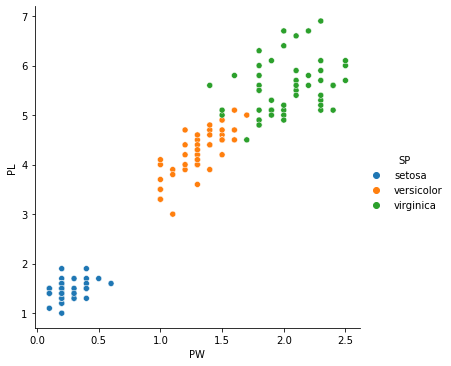

In [14]:
sns.relplot(data=Iris,x='PW',y='PL',hue='SP')

The plot obtained above is scatterplot obtained through seaborn showing the plot of PETAL LENGTH Vs PETAL WIDTH with respect to SPECIES.

## c) Obtain a DataFrame containing (i) Mean and (ii) Standard Deviation of Sepal length and Sepal width For each species.

In [15]:
df=Iris.pivot_table(values=['SL','SW'],aggfunc=['mean','std'],index='SP')

In [16]:
df

mean              std          
               SL     SW        SL        SW
SP                                          
setosa      5.006  3.428  0.352490  0.379064
versicolor  5.936  2.770  0.516171  0.313798
virginica   6.588  2.974  0.635880  0.322497

Above obtained is the dataframe containing mean and std dev of Sepal Length and Sepal Width for each speices.

## (d) Use formula api of StatsModels to fit a linear regression model, without intercept, for Petal length on Sepal length and Sepal width.

to fit a linear regression model through formula api we need to import formula.api from statsmodel as below

In [17]:
import statsmodels.formula.api as smf

In [18]:
model=smf.ols('PL~0+SL+SW',data=Iris)

In [19]:
resultfit=model.fit()
resultfit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                     PL   R-squared (uncentered):                   0.973
Model:                            OLS   Adj. R-squared (uncentered):              0.973
Method:                 Least Squares   F-statistic:                              2663.
Date:                Mon, 13 Dec 2021   Prob (F-statistic):                   9.22e-117
Time:                        23:40:55   Log-Likelihood:                         -155.50
No. Observations:                 150   AIC:                                      315.0
Df Residuals:                     148   BIC:                                      321.0
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
SL             1.5603      0.046     34.238      0.000       1.470       1.650
SW            -1.7457      0.087    -20.045      0.000      -1.918      -1.574
==============================================================================
Omnibus:                        2.882   Durbin-Watson:                   1.513
Prob(Omnibus):                  0.237   Jarque-Bera (JB):                2.892
Skew:                           0.330   Prob(JB):                        0.236
Kurtosis:                       2.836   Cond. No.                         11.6
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [21]:
import statsmodels.api as sm

As the values of r and rsquare(uncentered) as the model is fitted without intercept comes out to be 0.973 that is 97.3% of variation in PETAL LENGTH is explained by SEPAL LENGTH AND SEPAL WIDTH.

TypeError: only integer scalar arrays can be converted to a scalar index

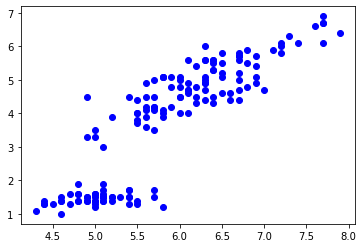

In [24]:
fig=sm.graphics.plot_fit(resultfit,'SL','SW',vlines=False,linestyle='-',marker='')

If asked from graph then only plot these.